In [12]:
import numpy as np
import pandas as pd
import os,time,random,tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.utils import shuffle


for dirname, _, filenames in os.walk('D:/CS 5100/MoA'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\CS 5100\MoA\sample_submission.csv
D:\CS 5100\MoA\test_features.csv
D:\CS 5100\MoA\train_features.csv
D:\CS 5100\MoA\train_targets_nonscored.csv
D:\CS 5100\MoA\train_targets_scored.csv


In [14]:
train_features = pd.read_csv('D:/CS 5100/MoA/train_features.csv')
train_targets = pd.read_csv('D:/CS 5100/MoA/train_targets_scored.csv')
# train_targets_nonscored = pd.read_csv('D:/CS 5100/MoA/train_targets_nonscored.csv')
test_features = pd.read_csv('D:/CS 5100/MoA/test_features.csv')
sample_submission = pd.read_csv('D:/CS 5100/MoA/sample_submission.csv')

In [15]:
train_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [16]:
test_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,...,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,48.030136,0.197471,-0.063233,0.137516,0.049622,0.052434,-0.147852,0.010424,-0.166886,-0.168069,...,-0.429980,-0.413215,-0.475762,-0.462484,-0.479196,-0.346450,-0.423905,-0.316387,-0.404859,-0.269792
std,19.414155,1.373476,0.800573,1.066475,0.949972,0.994018,1.204934,0.859452,1.088335,1.666240,...,2.013142,1.995433,1.963440,2.128477,2.149705,1.645669,2.086895,1.655524,1.790883,1.355936
min,24.000000,-5.321000,-4.142000,-6.996000,-3.765000,-6.312000,-8.717000,-6.037000,-8.833000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.502725,-0.552975,-0.431800,-0.465350,-0.445750,-0.576000,-0.521325,-0.477400,-0.526925,...,-0.527725,-0.521850,-0.539375,-0.540450,-0.548175,-0.561525,-0.497050,-0.521125,-0.531075,-0.541950
50%,48.000000,-0.060700,-0.027500,0.073400,-0.036450,-0.047800,-0.012500,-0.009200,0.002150,-0.002900,...,0.010050,0.010900,0.006550,0.017500,0.013450,-0.020000,0.043800,0.020450,0.030750,-0.006250
75%,72.000000,0.454650,0.429950,0.641125,0.423150,0.436050,0.498950,0.495975,0.422500,0.518050,...,0.478900,0.479625,0.442550,0.473300,0.487825,0.454400,0.501050,0.478925,0.487000,0.422800
max,72.000000,10.000000,4.536000,8.227000,10.000000,7.615000,6.356000,6.190000,2.995000,8.007000,...,4.936000,5.300000,3.268000,4.087000,5.290000,5.053000,5.276000,3.074000,3.859000,4.149000


Text(0.5, 1.0, 'Test cp dose')

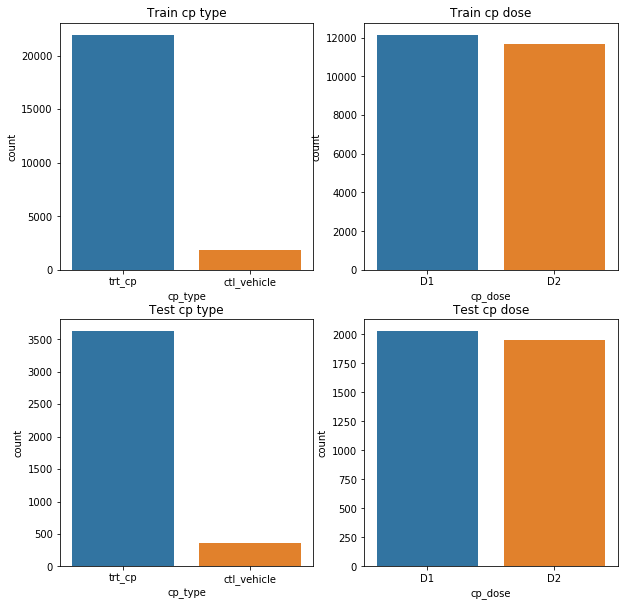

In [17]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='cp_type',data=train_features,ax=ax[0][0])
ax[0][0].set_title('Train cp type')
sns.countplot(x='cp_dose',data=train_features,ax=ax[0][1])
ax[0][1].set_title('Train cp dose')
sns.countplot(x='cp_type',data=test_features,ax=ax[1][0])
ax[1][0].set_title('Test cp type')
sns.countplot(x='cp_dose',data=test_features,ax=ax[1][1])
ax[1][1].set_title('Test cp dose')

In [18]:
train_features['cp_time'] = train_features['cp_time'].apply(lambda x:str(x))
test_features['cp_time'] = test_features['cp_time'].apply(lambda x:str(x))
train_features = train_features.join(pd.get_dummies(train_features[['cp_time','cp_type','cp_dose']])).drop(['cp_time','cp_type','cp_dose'],axis=1)
test_features = test_features.join(pd.get_dummies(test_features[['cp_time','cp_type','cp_dose']])).drop(['cp_time','cp_type','cp_dose'],axis=1)

In [19]:
test_ids = test_features['sig_id']
test_features.drop(['sig_id'],axis=1,inplace=True)

train_features.drop(['sig_id'],axis=1,inplace=True)
train_targets.drop(['sig_id'],axis=1,inplace=True)

X,y = np.array(train_features.values),np.array(train_targets.values)

In [20]:
X

array([[ 1.062 ,  0.5577, -0.2479, ...,  1.    ,  1.    ,  0.    ],
       [ 0.0743,  0.4087,  0.2991, ...,  1.    ,  1.    ,  0.    ],
       [ 0.628 ,  0.5817,  1.554 , ...,  1.    ,  1.    ,  0.    ],
       ...,
       [ 0.3942,  0.3756,  0.3109, ...,  0.    ,  0.    ,  1.    ],
       [ 0.666 ,  0.2324,  0.4392, ...,  1.    ,  1.    ,  0.    ],
       [-0.8598,  1.024 , -0.1361, ...,  1.    ,  1.    ,  0.    ]])

In [21]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
train_targets.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,...,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,...,0.015871,0.032384,0.044851,0.114429,0.055283,0.015871,0.084190,0.033025,0.040436,0.035472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
